In [1]:
import requests 
import json 
import pandas as pd 
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://pokeapi.co/api/v2/pokemon?limit=1200"
response = requests.get(url)
contenido= response.content

In [3]:
%%time
# Lista completa de pokemones
data = json.loads(response.text)
listado=data["results"]

df=pd.DataFrame(listado)
df=df.drop(labels='url', axis=1)
df.shape

Wall time: 6 ms


(1118, 1)

## Funcion por nombre

In [16]:
pokemones=df['name'].unique()

In [8]:
%%time
resultados=[]
for y in pokemones:
    url_stat = "https://pokeapi.co/api/v2/pokemon/"+ str(y)
    response_stat = requests.get(url_stat)
    pokelist= pd.json_normalize(json.loads(response_stat.text))[['id','name','height','weight','base_experience']]
    resultados.append(pokelist)
    df1=df.append(resultados).dropna()
    df1.reset_index(drop=True, inplace=True)

Wall time: 3min 44s


In [15]:
df1.tail(10)

,name,id,height,weight,base_experience
1108,centiskorch-gmax,10211.0,750.0,10000.0,184.0
1109,hatterene-gmax,10212.0,260.0,10000.0,255.0
1110,grimmsnarl-gmax,10213.0,320.0,10000.0,255.0
1111,alcremie-gmax,10214.0,300.0,10000.0,173.0
1112,copperajah-gmax,10215.0,230.0,10000.0,175.0
1113,duraludon-gmax,10216.0,430.0,10000.0,187.0
1114,eternatus-eternamax,10217.0,1000.0,10000.0,345.0
1115,urshifu-single-strike-gmax,10218.0,290.0,10000.0,275.0
1116,urshifu-rapid-strike-gmax,10219.0,260.0,10000.0,275.0
1117,toxtricity-low-key-gmax,10220.0,240.0,10000.0,176.0


## Agregar TIPO

In [17]:
%%time
y=0
typelist=[]
for y in pokemones:
    url3 = "https://pokeapi.co/api/v2/pokemon/"+str(y)
    response3 = requests.get(url3)
    contenido3= response3.content
    data3 = json.loads(response3.text)
    results3=data3["types"]
    slot1=results3[0:1]
    tipo=slot1[0]['type']['name']
    typelist.append(tipo)
    
df3 = pd.DataFrame(typelist, columns=['Tipo'])

Wall time: 1min 27s


In [22]:
bigdata = pd.concat([df1,df3], axis=1)
bigdata.head()

,name,id,height,weight,base_experience,Tipo
0,bulbasaur,1.0,7.0,69.0,64.0,grass
1,ivysaur,2.0,10.0,130.0,142.0,grass
2,venusaur,3.0,20.0,1000.0,236.0,grass
3,charmander,4.0,6.0,85.0,62.0,fire
4,charmeleon,5.0,11.0,190.0,142.0,fire


## Graficas

In [19]:
values=bigdata['Tipo'].value_counts()
tags=bigdata['Tipo'].unique()
values

water       141
normal      118
grass        96
bug          85
psychic      80
electric     77
rock         73
fire         69
dark         48
ghost        46
fighting     45
poison       43
dragon       43
ground       42
steel        40
ice          39
fairy        24
flying        9
Name: Tipo, dtype: int64

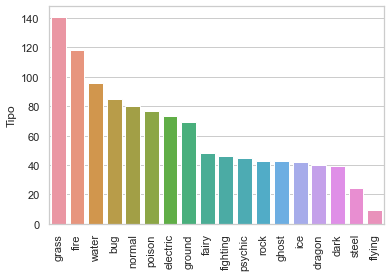

In [20]:
sns.set_theme(style="whitegrid")
plt.xticks(rotation=90)
ax = sns.barplot(x=tags, y=values, data=bigdata)

## APENDIX

#### FUNCION X ID

In [4]:
# %%time
# x=0
# result=[]
# while x < 898:
#         x=x +1
#         url_stat = "https://pokeapi.co/api/v2/pokemon/"+ str(x)
#         response_stat = requests.get(url_stat)
#         pokelist= pd.json_normalize(json.loads(response_stat.text))[['id','name','height','weight','base_experience']]
#         result.append(pokelist)
#         df1=df.append(result).dropna()
#         df1.reset_index(drop=True, inplace=True)
# # df2.to_csv('pokemon.csv', index=False)

In [5]:
# %%time
# x1=10000
# result1=[]
# while x1 < 10220:
#         x1=x1 +1
#         url_stat1 = "https://pokeapi.co/api/v2/pokemon/"+ str(x1)
#         response_stat1 = requests.get(url_stat1)
#         pokelist1= pd.json_normalize(json.loads(response_stat1.text))[['id','name','height','weight','base_experience']]
#         result1.append(pokelist1)
#         df2=df.append(result1).dropna()
#         df2.reset_index(drop=True, inplace=True)
# # df2.to_csv('pokemon.csv', index=False)

#### Locator Type Fx

In [ ]:
# ## LOCATOR DE TYPE
# url3 = "https://pokeapi.co/api/v2/pokemon/2/"
# response3 = requests.get(url3)
# contenido3= response3.content
# data3 = json.loads(response3.text)
# results3=data3["types"]
# slot1=results3[0:1]
# grass=slot1[0]['type']['name']
# grass

In [ ]:
# def poketype(y):
#     url3 = "https://pokeapi.co/api/v2/pokemon/"+str(y)
#     response3 = requests.get(url3)
#     contenido3= response3.content
#     data3 = json.loads(response3.text)
#     results3=data3["types"]
#     slot1=results3[0:1]
#     tipo=slot1[0]['type']['name']
#     df2['tipo']= tipo
#     return df2